In [1]:
import pandas as pd
df = pd.read_csv("Housing_dataset.csv")
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(None,
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  )

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2, model.coef_, model.intercept_

(970043.4039201636,
 1754318687330.6638,
 0.6529242642153184,
 array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
         2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
         6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
        -4.13645062e+05]),
 np.float64(260032.35760741215))

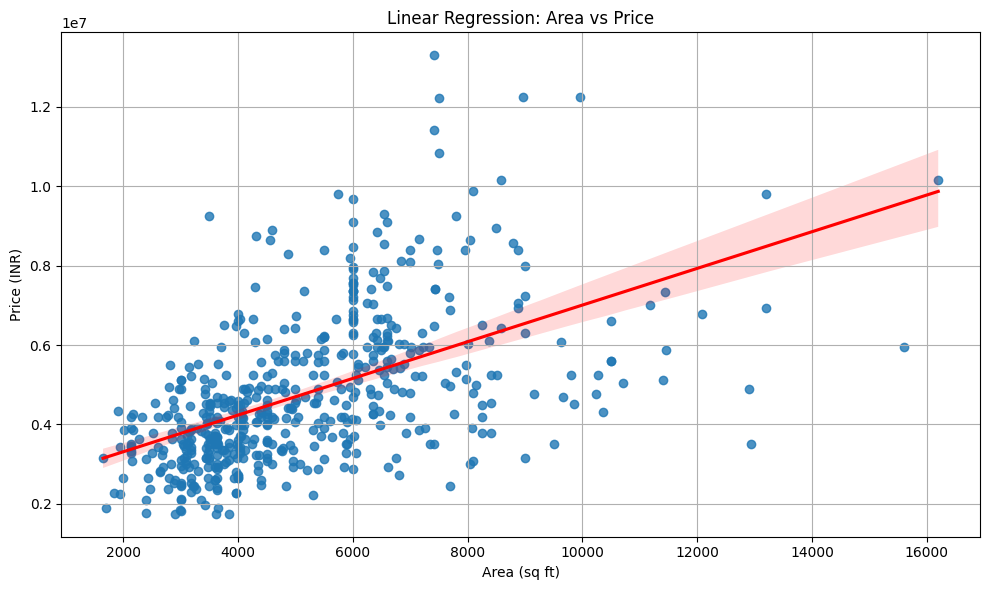

In [3]:
# Plotting regression for 'area' vs 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x=df['area'], y=df['price'], line_kws={"color": "red"})
plt.title("Linear Regression: Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()